# **LAB2——信息隐藏实验**

### 库调用

In [48]:
from PIL import Image

### 基础函数

In [49]:
# 字符to八位二进制
def str_to_binary(s):
    return ''.join(format(ord(c), '08b') for c in s)
# 二进制to字符
def binary_to_str(b):
    return ''.join(chr(int(b[i:i+8], 2)) for i in range(0, len(b), 8) if i+8 <= len(b))
# 低位置0
def setZero(rgb):
    for i in range(rgb.size[0]): # 将图片每个像素rgb三元组的最后一位全部置零
        for j in range(rgb.size[1]):
            r = rgb.getpixel((i, j))[0]
            g = rgb.getpixel((i, j))[1]
            b = rgb.getpixel((i, j))[2]
            if(r%2==1):
                r=r-1
            if (g % 2 == 1):
                g = g - 1
            if (b % 2 == 1):
                b = b - 1
            rgb.putpixel((i,j), (r,g,b))
# 隐藏
def hide(rgb, output_path, info):
    cur= 0
    for i in range(rgb.size[0]):
        for j in range(rgb.size[1]):
            # print(rgb.getpixel((i, j)))
            if(cur >= len(info)): # 指针越界及时跳出
                break
            r = rgb.getpixel((i, j))[0]+ (ord(info[cur])-ord('0')) # 将水印写入最后一位
            if (cur+1 >= len(info)):
                break
            g = rgb.getpixel((i, j))[1]+ (ord(info[cur+1])-ord('0'))
            if (cur+2 >= len(info)):
                break
            b = rgb.getpixel((i, j))[2]+ (ord(info[cur+2])-ord('0'))
            cur= cur+ 3
            rgb.putpixel((i, j), (r, g, b))
    rgb.save(output_path) # 保存带水印的图片

def extract(output_path, info) -> str:
    carrier= Image.open(output_path) # 打开带水印的图片
    rgb= carrier.convert("RGB") #转为RGB形式
    output_binary = ""
    for i in range(rgb.size[0]):# 遍历像素，提取rgb最后一位
        for j in range(rgb.size[1]):
            if(len(output_binary) >= len(info)): # 提取完成及时跳出
                break
            output_binary= output_binary + str(rgb.getpixel((i, j))[0] % 2)
            if (len(output_binary) >= len(info)):
                break
            output_binary = output_binary + str(rgb.getpixel((i, j))[1] % 2)
            if (len(output_binary) >= len(info)):
                break
            output_binary = output_binary + str(rgb.getpixel((i, j))[2] % 2)
    return output_binary

### 信息隐藏
1. 将图像文件中的所有像素点以RGB形式分隔开，并将各个颜色分量转换成二进制表示
2. 把每个颜色分量值的最后一位全部设置成0，对图像得影响非常细微，不会影响图像的显示格式
3. 信息嵌入：将水印字符转化为二进制字符串，并将这些信息依次填入颜色分量的最低位上，即可完成信息的嵌入

In [50]:
# 隐藏信息
hidden_msg = "CQUWATERMASKEXP"
input_path = "./input.bmp"
output_path = "./output.bmp"
# 将隐藏信息转为二进制
str_to_binary(hidden_msg)


'010000110101000101010101010101110100000101010100010001010101001001001101010000010101001101001011010001010101100001010000'

In [51]:
carrier= Image.open(input_path)
rgb_carrier= carrier.convert('RGB') # 以RGB模式打开
setZero(rgb_carrier) # 最后一位置零

In [52]:
hide(rgb_carrier, output_path, str_to_binary(hidden_msg))
print("隐藏成功")

隐藏成功


### 信息提取
1. 将图像像素的最低位依次提取出来，并进行拼接，即可得到原始信息

In [53]:
ans_binary = extract(output_path, str_to_binary(hidden_msg))
binary_to_str(ans_binary)

'CQUWATERMASKEXP'

### 前后图片对比

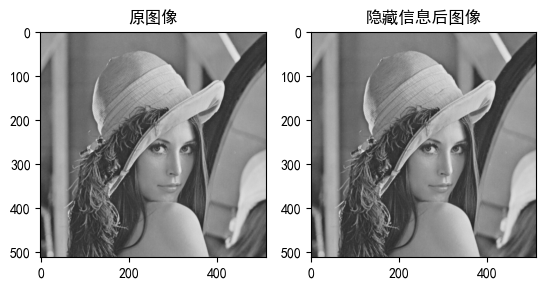

In [58]:
import matplotlib.pyplot as plt
img1 = plt.imread(input_path)
img2 = plt.imread(output_path)
plt.subplot(121)
plt.title("原图像")
plt.imshow(img1,cmap='gray')
plt.subplot(122)
plt.title("隐藏信息后图像")
plt.imshow(img2, cmap='gray')
# 显示对比图
plt.show()